### Student Information
Name:李群雅

Student ID:d119108010

GitHub ID:ElmaLee168

---

In [ ]:
### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [38]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk
import plotly as py
import math
# my functions 我們用helper裡面的功能協助
import helpers.data_mining_helpers as dmh    
import matplotlib.pyplot as plt

data = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
print(data.head(3))

      type             datetime  post_id       subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9  wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio     StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1               https://i.redd.it/7tl6puv9waue1.jpeg      -15        NaN   
2  https://apnews.com/article/trump-truth-social-...        1        NaN   

   upvote_ratio                                               text  \
0           NaN                                   Calls on retards   
1

In [11]:
print(len(data))
print(data.columns)
print(data.info())

847
Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847

In [13]:
# 取出第一列（第 0 筆資料）
row = data.iloc[0]
# 將所有欄位的值轉成字串並合併
combined = " ".join(str(value) for value in row)
print(combined)

comment 2025-04-11 17:29:56 mmli62w wallstreetbets Retardation is on the menu boys! WSB is so back StickyTip420 https://i.redd.it/0yq2ftren8ue1.jpeg 0 nan nan Calls on retards 1.0 -0.9 -1.0 [] -1.0


In [22]:
#看看裡面有多少不同的值
#data["type"].nunique()
#data["subreddit"].nunique()
#data["upvotes"].nunique()
#data["downvotes"].nunique()
#data["upvote_ratio"].nunique()
#data["subjectivity"].nunique()
#data["polarity"].nunique()
#data["sentiment"].nunique()
#data["label"].nunique()

3

In [24]:
data.isnull().apply(lambda x: dmh.check_missing_values(data))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
data.isnull().apply(lambda x:dmh.check_missing_values(data),axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [26]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844    False
845    False
846    False
Length: 847, dtype: bool

In [27]:
sum(data.duplicated())

0

In [29]:
data_sample = data.sample(n=100)
data_sample[0:4]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
431,comment,2021-02-01 20:22:32,gln78c0,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",FearLaChancla,https://www.reddit.com/r/stocks/comments/la34b...,2,NaN,NaN,You know who happens to make money on silver r...,0.000000,0.0,0.0,"['shitadel', 'rising', 'gme', 'money', 'silver']",-1.0
195,comment,2025-04-11 15:38:10,mmkvdoj,stocks,U.S. 10-year Treasury yields rise as Trump tar...,Material-Gift6823,https://www.reddit.com/r/stocks/comments/1jwfy...,1,NaN,NaN,So wait on tax day or after your expecting thi...,0.000000,0.0,0.0,"['tax', 'day']",0.0
408,comment,2021-02-01 23:52:13,glo1x7s,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",stephen6686,https://www.reddit.com/r/stocks/comments/la34b...,3,NaN,NaN,I just bought more physical metal,0.142857,0.0,0.0,['metal'],0.0
296,comment,2025-04-11 9:02:58,mmj7m0q,StockMarket,🚨China responds to Trump’s 145% tariff with an...,hypocrisy-identifier,https://i.redd.it/2f7y4h6226ue1.jpeg,1,NaN,NaN,Really good one!!,0.600000,1.0,1.0,[],1.0


In [31]:
print(data.type.value_counts())

type
comment    783
post        64
Name: count, dtype: int64


In [33]:
print(data.subreddit.value_counts())

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


In [34]:
print(data.sentiment.value_counts())

sentiment
 0.0    331
 1.0    319
-1.0    197
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit distribution for all data'}, xlabel='subreddit'>

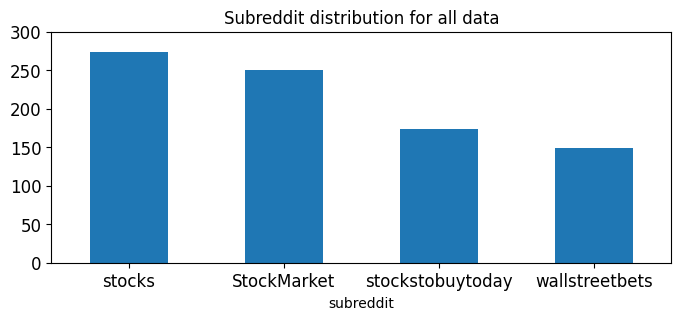

In [40]:
data.subreddit.value_counts().plot(kind = 'bar',
                                    title = 'Subreddit distribution for all data',
                                    ylim = [0, 300], 
                                    rot = 0, fontsize = 12, figsize = (8,3))

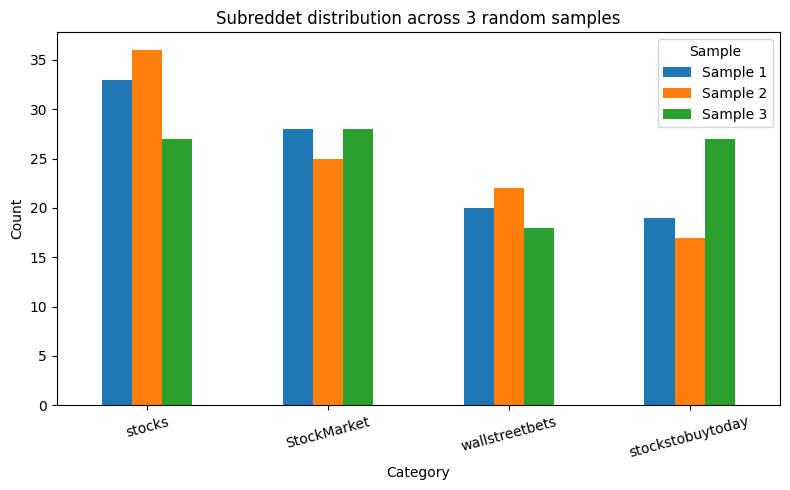

In [39]:
# 抽三次樣本並計算每個類別的數量
samples = []
for i in range(3):
    data_sample = data.sample(n=100, random_state=i)
    counts = data_sample["subreddit"].value_counts()
    samples.append(counts)

# 合併成一個 DataFrame（每欄是一個 sample）
df_samples = pd.concat(samples, axis=1)
df_samples.columns = ["Sample 1", "Sample 2", "Sample 3"]
df_samples = df_samples.fillna(0)  # 若有類別沒被抽到，補 0

# 畫分組長條圖
df_samples.plot(
    kind="bar",
    figsize=(8, 5),
    title="Subreddet distribution across 3 random samples",
)

plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.legend(title="Sample")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Sentiment distribution for all data'}, xlabel='sentiment'>

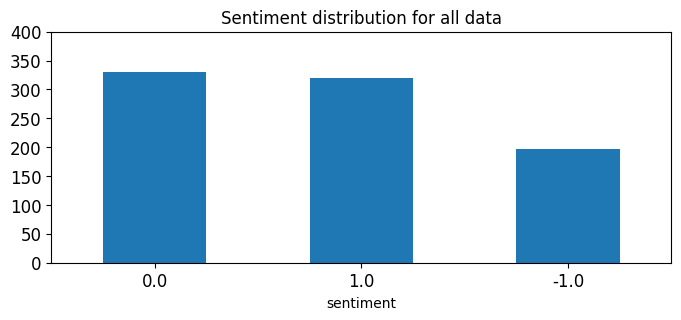

In [43]:
data.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution for all data',
                                    ylim = [0, 400], 
                                    rot = 0, fontsize = 12, figsize = (8,3))

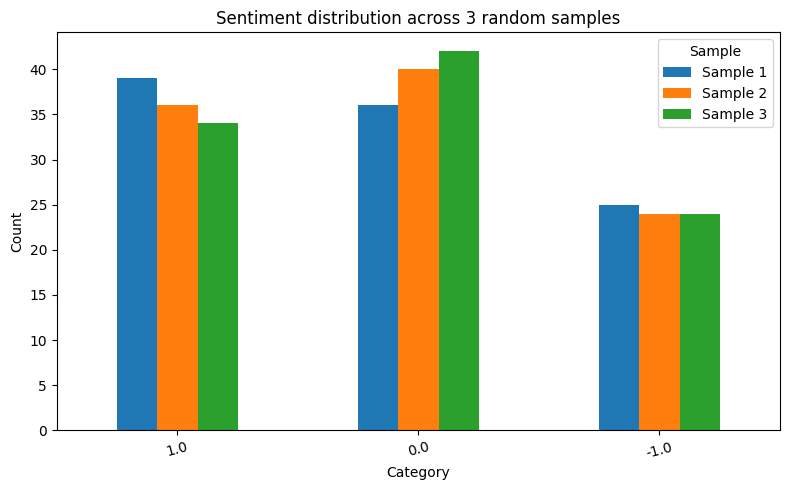

In [44]:
# 抽三次樣本並計算每個類別的數量
samples = []
for i in range(3):
    data_sample = data.sample(n=100, random_state=i)
    counts = data_sample["sentiment"].value_counts()
    samples.append(counts)

# 合併成一個 DataFrame（每欄是一個 sample）
df_samples = pd.concat(samples, axis=1)
df_samples.columns = ["Sample 1", "Sample 2", "Sample 3"]
df_samples = df_samples.fillna(0)  # 若有類別沒被抽到，補 0

# 畫分組長條圖
df_samples.plot(
    kind="bar",
    figsize=(8, 5),
    title="Sentiment distribution across 3 random samples",
)

plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.legend(title="Sample")
plt.tight_layout()
plt.show()

In [45]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [47]:
data['unigrams'] = data['text'].apply(lambda x: dmh.tokenize_text(x))
data[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [48]:
data[0:4]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,unigrams
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,"[Calls, on, retards]"
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,"[Seeing, lots, of, red, in, the, ticker, .]"
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [49]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.text) #learn the vocabulary and return document-term matrix
print(data_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1


In [51]:
count_vect.get_feature_names_out()[1887]

'hhn'

In [52]:
count_vect.get_feature_names_out()[887]

'company'

In [53]:
count_vect.get_feature_names_out()[87]

'2k'

In [56]:
analyze = count_vect.build_analyzer()
analyze(data.text[0])

['calls', 'on', 'retards']

In [57]:
data_counts.shape

(847, 4346)

In [58]:
data_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [60]:
row = data_counts[4]  

# 找出出現次數為 1 的那些詞
word_indices = row.nonzero()[1]  # 把非零的位置取出（代表有出現過的詞索引）

# 對應詞彙名稱
feature_names = count_vect.get_feature_names_out()

# 看看那些詞
for i in word_indices:
    print(feature_names[i])

he
didn
say
thank
you


New matrix shape: (847, 1099)


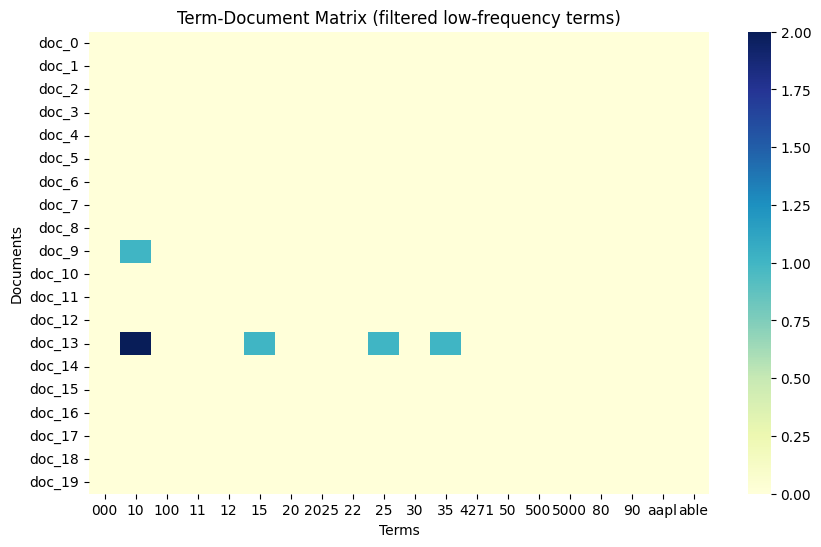

In [61]:
#可以filter掉頻率比較少的詞(比如說小於3次)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(min_df=3, max_df=0.7)   # 出現少於 3 次或太常見的字會被過濾掉
data_counts = count_vect.fit_transform(data.text)

print("New matrix shape:", data_counts.shape)

# 把部分樣本轉成可視化的 array
plot_z = data_counts[:20, :20].toarray()  # 前 20 篇文章、前 20 個詞
plot_x = count_vect.get_feature_names_out()[:20]
plot_y = ["doc_" + str(i) for i in range(20)]

plt.figure(figsize=(10,6))
sns.heatmap(plot_z, cmap="YlGnBu", xticklabels=plot_x, yticklabels=plot_y)
plt.title("Term-Document Matrix (filtered low-frequency terms)")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15440\1961780439.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


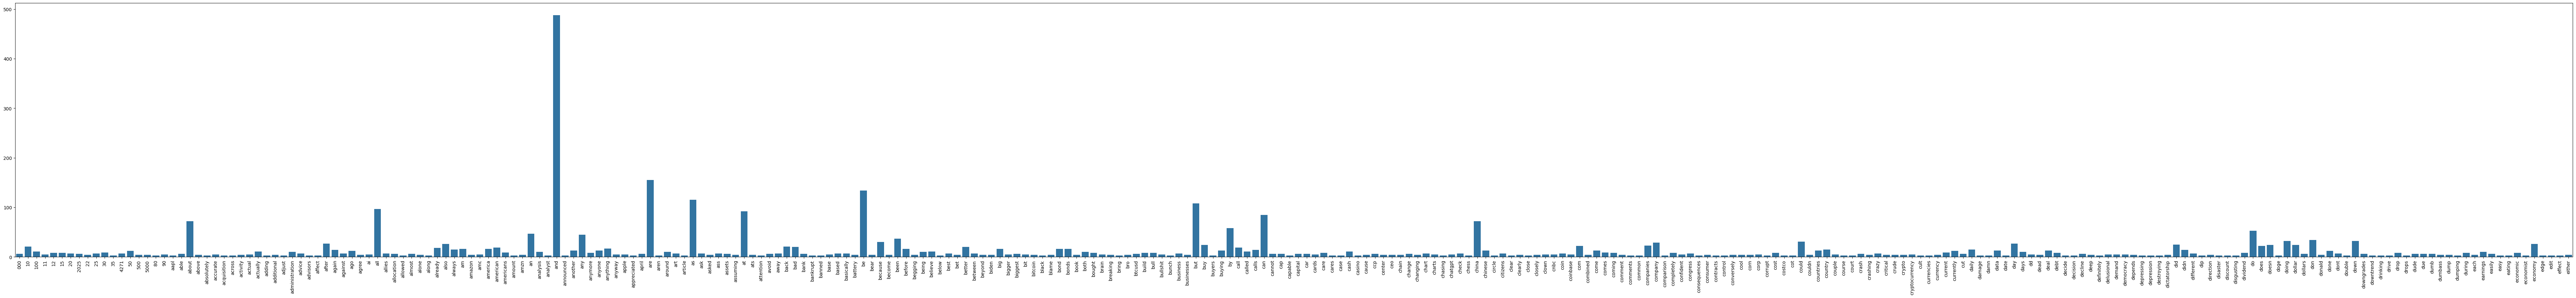

In [62]:
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

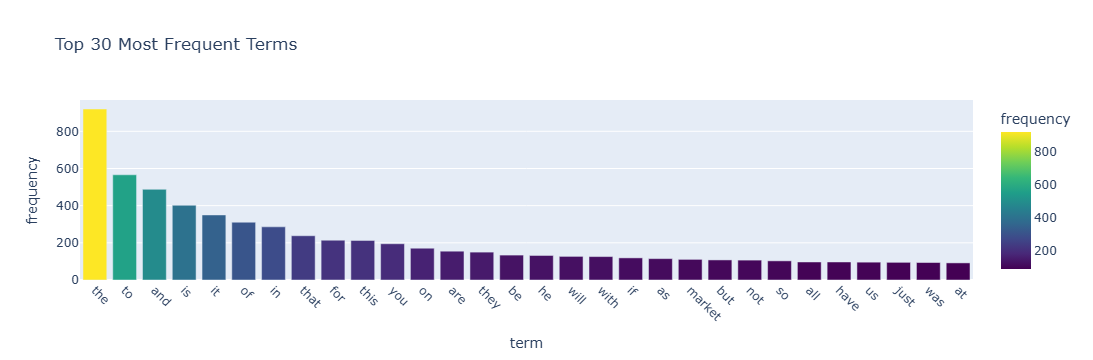

In [63]:
import plotly.express as px
import pandas as pd

# 建立 DataFrame
df = pd.DataFrame({
    'term': count_vect.get_feature_names_out(),
    'frequency': term_frequencies
})

# 取出前 30 個最高頻的詞
df_top = df.sort_values(by='frequency', ascending=False).head(30)

fig = px.bar(df_top,
             x='term', y='frequency',
             title='Top 30 Most Frequent Terms',
             color='frequency',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_tickangle=45)
fig.show()

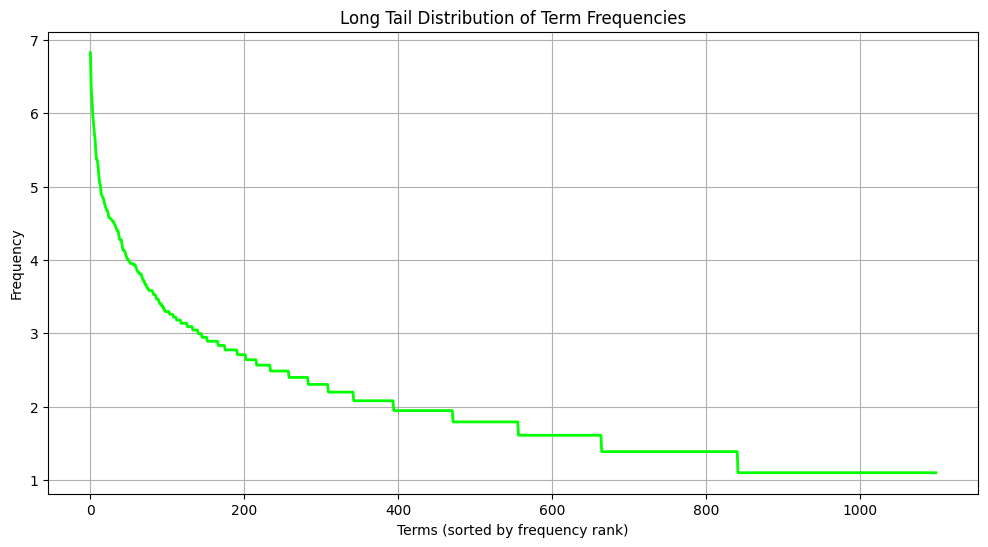

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

term_frequencies_log = [math.log(i) for i in term_frequencies]

# 以詞頻建立 DataFrame
df = pd.DataFrame({
    'term': count_vect.get_feature_names_out(),
    'frequency': term_frequencies_log
})

# 依詞頻排序
df_sorted = df.sort_values(by='frequency', ascending=False).reset_index(drop=True)


plt.figure(figsize=(12, 6))
plt.plot(df_sorted['frequency'].values, color='lime', linewidth=2)
plt.title("Long Tail Distribution of Term Frequencies")
plt.xlabel("Terms (sorted by frequency rank)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here